## TP2 AI : **Problème CSP**
Considérons le jeu du Sudoku où il s’agit de passer d’un état initial (par exemple celui à
gauche) à un état final (par exemple celui à droite)
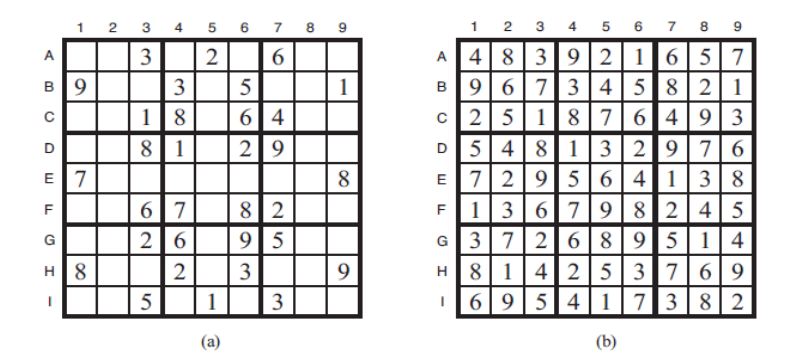

### **1- Résoudre le Sudoku par algorithme Backtracking sans heuristique**

In [ ]:
class SudokuCSP:

    def __init__(self, puzzle):
        self.grid = puzzle

# Check if 'num' is not in the same row and column or in the 3x3 box
    def is_valid(self, row, col, num):
        # Check if 'num' is not in the same row and column
        for i in range(9):
            if (self.grid[row][i] == num or self.grid[i][col] == num):
                return False


        # Check if 'num' is not in the same 3x3 box

        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if self.grid[start_row + i][start_col + j] == num:
                    return False

        return True

    def find_empty_location(self):
        # Find an empty position (0) in the grid
        for i in range(9):
            for j in range(9):
                if self.grid[i][j] == 0:
                    return i, j
        return None
    # Backtracking solver

    def solve(self):
        # Find an empty position
        empty_location = self.find_empty_location()

        # If there is no empty position, the puzzle is solved
        if not empty_location:
            return True

        row, col = empty_location

        # Try placing a number from 1 to 9
        for num in range(1, 10):
            if self.is_valid(row, col, num):
                # If the placement is valid, update the grid
                self.grid[row][col] = num

                # Recursively try to solve the rest of the puzzle
                if self.solve():
                    return True

                # If placing the current number doesn't lead to a solution, backtrack
                self.grid[row][col] = 0

        # If no number leads to a solution, backtrack
        return False

# Display the solved Sudoku grid
    def display(self):
         for row in self.grid:
            print(row)

    # Example usage:
puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

sudoku_csp = SudokuCSP(puzzle)
if sudoku_csp.solve():
    print("Sudoku solved:")
    sudoku_csp.display()
else:
    print("No solution exists.")

### **2- Résoudre le Sudoku par algorithme Backtracking avec heuristique**

Pour améliorer les performances de l'algorithme en ajoutant une heuristique, vous pouvez utiliser une stratégie de sélection plus intelligente pour choisir la prochaine case vide à remplir. Une heuristique couramment utilisée est la méthode du **"minimum remaining values" (MRV)**, qui consiste à choisir la case vide avec le moins de choix possibles.

In [ ]:
from tabulate import tabulate

class SudokuCSP:
    def __init__(self, puzzle):
        self.grid = puzzle

    def is_valid(self, row, col, num):
        # Check if 'num' is not in the same row and column
        for i in range(9):
            if (self.grid[row][i] == num or self.grid[i][col] == num):
                return False


        # Check if 'num' is not in the same 3x3 box
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if self.grid[start_row + i][start_col + j] == num:
                    return False

        return True

    def find_empty_location(self):
        empty_locations = []
        for i in range(9):
            for j in range(9):
                if self.grid[i][j] == 0:
                    empty_locations.append((i, j))
        return empty_locations

  # Minimum Remaining Values (MRV) heuristic
    def mrv_heuristic(self):
        empty_locations = self.find_empty_location()
        # Check if there are any empty locations left
        if not empty_locations:
            return None
        return min(empty_locations, key=lambda pos: len(self.get_possible_values(pos[0], pos[1])))

  # Get possible values for a given empty position (1..10)
    def get_possible_values(self, row, col):
        possible_values = set(range(1, 10))
        for i in range(9):
            possible_values.discard(self.grid[row][i])
            possible_values.discard(self.grid[i][col])
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                possible_values.discard(self.grid[start_row + i][start_col + j])

        return possible_values

    # Backtracking solver with MRV heuristic
    def solve(self):
        empty_location = self.mrv_heuristic()

        if empty_location is None:
            return True
        row, col = empty_location

        for num in self.get_possible_values(row, col):
            if self.is_valid(row, col, num):

                self.grid[row][col] = num

                if self.solve():
                    return True

                self.grid[row][col] = 0
        return False

    def display(self):
        table = [[self.grid[i][j] if self.grid[i][j] != 0 else "" for j in range(9)] for i in range(9)]
        print(tabulate(table, tablefmt="fancy_grid"))

# Example usage:
puzzle = [
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

sudoku_csp = SudokuCSP(puzzle)
if sudoku_csp.solve():
    print("Sudoku solved:")
    sudoku_csp.display()
else:
    print("No solution exists.")


Sudoku solved:
╒═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╤═══╕
│ 5 │ 3 │ 4 │ 6 │ 7 │ 8 │ 9 │ 1 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 6 │ 7 │ 2 │ 1 │ 9 │ 5 │ 3 │ 4 │ 8 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 1 │ 9 │ 8 │ 3 │ 4 │ 2 │ 5 │ 6 │ 7 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 8 │ 5 │ 9 │ 7 │ 6 │ 1 │ 4 │ 2 │ 3 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 4 │ 2 │ 6 │ 8 │ 5 │ 3 │ 7 │ 9 │ 1 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 7 │ 1 │ 3 │ 9 │ 2 │ 4 │ 8 │ 5 │ 6 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 9 │ 6 │ 1 │ 5 │ 3 │ 7 │ 2 │ 8 │ 4 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 2 │ 8 │ 7 │ 4 │ 1 │ 9 │ 6 │ 3 │ 5 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 3 │ 4 │ 5 │ 2 │ 8 │ 6 │ 1 │ 7 │ 9 │
╘═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╧═══╛
